# Kaggle Learn-and-compete `Poker Rule Induction`

## Data Description

You are provided with 25,010 poker hands in train.csv and 1,000,000 in test.csv. Each hand consists of five cards with a given suit and rank, drawn from a standard deck of 52. Suits and ranks are represented as ordinal categories:

```
S1 “Suit of card #1”
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}
C1 “Rank of card #1”
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

...

S5 “Suit of card #5”
C5 “Rank of card #5”
```

Each row in the training set has the accompanying class label for the poker hand it comprises. The hands are omitted from the test set and must be predicted by participants. Hands are classified into the following ordinal categories:


```
0: Nothing in hand; not a recognized poker hand 
1: One pair; one pair of equal ranks within five cards
2: Two pairs; two pairs of equal ranks within five cards
3: Three of a kind; three equal ranks within five cards
4: Straight; five cards, sequentially ranked with no gaps
5: Flush; five cards with the same suit
6: Full house; pair + different rank three of a kind
7: Four of a kind; four equal ranks within five cards
8: Straight flush; straight + flush
9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush
```
Note that the Straight flush and Royal flush hands are not representative of
the true domain because they have been over-sampled. The straight flush
is 14.43 times more likely to occur in the training set, while the royal flush is 129.82 times more likely.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from functools import reduce

#### Read data

In [2]:
test_dataset = pd.read_csv('test.csv', delimiter=',')

In [3]:
test_dataset

,id,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,10,2,2,3,3,3,8,1,1
1,2,2,13,3,5,3,7,4,6,1,4
2,3,1,3,1,11,2,8,2,1,2,4
3,4,1,6,3,3,4,7,1,8,3,11
4,5,2,10,3,4,1,6,2,12,2,6
5,6,1,4,3,10,2,11,2,6,1,7
6,7,1,10,3,8,1,4,3,11,3,9
7,8,2,11,3,8,1,1,1,11,2,3
8,9,3,4,1,1,1,3,3,5,3,6
9,10,3,12,2,1,1,3,1,2,3,10


In [4]:
train_dataset = pd.read_csv('train.csv', delimiter=',')

In [5]:
data = train_dataset[['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5']]
labels = train_dataset[['hand']]

In [6]:
data[0:10]

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,4,9,2,1,2,2,4,7,2,8
1,1,4,3,6,1,12,3,11,2,7
2,1,11,4,1,3,7,4,11,2,1
3,2,9,2,4,3,6,1,9,4,9
4,1,8,2,4,2,11,2,2,2,1
5,2,5,1,5,2,13,2,3,3,13
6,3,10,4,6,1,4,2,13,4,5
7,4,10,3,1,2,13,4,2,4,7
8,3,2,4,10,3,3,4,4,1,9
9,2,7,3,8,4,8,2,13,2,12


In [7]:
labels_vect = tf.keras.utils.to_categorical(labels)

#### 52 encoding

In [89]:
def data_52encode(data):
    columns = []
    for i in range(1, 5):
        for j in range(1, 14):
            columns.append(str(i) + str(j))
    
    data_squashed = pd.DataFrame()
    for i in range(1, 6):
        column_S = 'S' + str(i)
        column_C = 'C' + str(i)
        data_squashed[column_S+column_C] = data[column_S].astype(str) + data[column_C].astype(str)
    
    data_encoded = pd.DataFrame(data = np.zeros((data.shape[0], len(columns))), columns=columns)

    for i in range(data.shape[0]):
        row = data_squashed.iloc[i, :]
        for col in data_squashed.columns:
            data_encoded[row[col]][i] = data_encoded[row[col]][i] + 1
    
    return data_encoded - .5

In [90]:
data_52encoded = data_52encode(data)

In [78]:
def get_hand_df(hand):
    return pd.DataFrame({
        'S1': [hand[0]],
        'C1': [hand[1]],
        'S2': [hand[2]],
        'C2': [hand[3]],
        'S3': [hand[4]],
        'C3': [hand[5]],
        'S4': [hand[6]],
        'C4': [hand[7]],
        'S5': [hand[8]],
        'C5': [hand[9]],
    })

#### Normalization

In [77]:
def normalize(data, columns):
    scaler = preprocessing.StandardScaler().fit(data[columns])
    data_normalized = pd.DataFrame(scaler.transform(data[columns]))
    return pd.concat([data.drop(columns, axis=1), data_normalized], axis=1)

In [84]:
columns_to_normalize = data_52encoded.columns
data_normalized = normalize(data_52encoded, columns_to_normalize)
data_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.324901,-0.325052,-0.331553,-0.328574,-0.327976,-0.323169,-0.319762,-0.333185,-0.325353,-0.333851,...,-0.331702,-0.321657,-0.317554,3.060178,-0.331776,3.039311,-0.324224,-0.325052,-0.325878,-0.327677
1,-0.324901,-0.325052,-0.331553,3.043455,-0.327976,-0.323169,-0.319762,-0.333185,-0.325353,-0.333851,...,-0.331702,-0.321657,-0.317554,-0.326778,-0.331776,-0.329022,-0.324224,-0.325052,-0.325878,-0.327677
2,-0.324901,-0.325052,-0.331553,-0.328574,-0.327976,-0.323169,-0.319762,-0.333185,-0.325353,-0.333851,...,-0.331702,-0.321657,-0.317554,-0.326778,-0.331776,-0.329022,-0.324224,3.076432,-0.325878,-0.327677
3,-0.324901,-0.325052,-0.331553,-0.328574,-0.327976,-0.323169,-0.319762,-0.333185,3.073589,-0.333851,...,-0.331702,-0.321657,-0.317554,-0.326778,-0.331776,3.039311,-0.324224,-0.325052,-0.325878,-0.327677
4,-0.324901,-0.325052,-0.331553,-0.328574,-0.327976,-0.323169,-0.319762,3.001334,-0.325353,-0.333851,...,-0.331702,-0.321657,-0.317554,-0.326778,-0.331776,-0.329022,-0.324224,-0.325052,-0.325878,-0.327677


#### Test function

In [80]:
def calc_hand_label(hand):    
    def f(hand):
        suits_hist = reduce(lambda d,x: {**d, **{x: (d.get(x, 0) + 1)}}, hand[:,0], {})
        ranks_hist = reduce(lambda d,x: {**d, **{x: (d.get(x, 0) + 1)}}, hand[:,1], {})
        
        if len(ranks_hist.values()) < 5:
            if len(ranks_hist.values()) == 2:
                if max(list(ranks_hist.values())) == 4:
                    return 7
    #                 print('7: Four of a kind; four equal ranks within five cards')
                else:
                    return 6
    #                 print('6 Full house; pair + different rank three of a kind')
            elif len(ranks_hist.values()) == 3:
                if max(list(ranks_hist.values())) == 3:
                    return 3
    #                 print('3: Three of a kind; three equal ranks within five cards')
                else:
                    return 2
    #                 print('2: Two pairs; two pairs of equal ranks within five cards')
            else:
                return 1
    #             print('1: One pair; one pair of equal ranks within five cards')
        else:
            if len(suits_hist.values()) == 1:
                if max(list(ranks_hist.keys())) -  min(list(ranks_hist.keys())) == 4:
                    if max(list(ranks_hist.keys())) == 13:
                        return 9
    #                     print('9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush')
                    else:
                        return 8
    #                     print('8: Straight flush; straight + flush')
                else:
                    return 5
    #                 print('5: Flush; five cards with the same suit')
            elif max(list(ranks_hist.keys())) -  min(list(ranks_hist.keys())) == 4:
                return 4    
    #             print('4: Straight; five cards, sequentially ranked with no gaps')
            else:
                return 0
                print('0: Nothing in hand; not a recognized poker hand ')
                
    hand = np.array(hand).reshape(5,2)
    res1 = f(hand)
    
    hand[:,1] = list(map(lambda x: 13 if (x == 1) else x-1, hand[:,1]))
    res2 = f(hand)
    
    if res1 == 9 and res2 == 8:
        return res2
    else:
        return max(res1, res2)

#### Encode cards

In [81]:
def card_encode(s, c):
    cards=["A","2","3","4","5","6","7","8","9","10","J","Q","K"]
    suits="♥♦♣♠"
    return cards[c - 1] + suits[s - 1]

def hand_encode(hand):
    return ', '.join(map(lambda x: card_encode(hand[x*2], hand[x*2+1]),range(5)))

print(hand_encode([4,9,2,1,2,2,4,7,2,8]))
print(hand_encode([2,9,2,4,3,6,1,9,4,9]))

9♠, A♦, 2♦, 7♠, 8♦
9♦, 4♦, 6♣, 9♥, 9♠


### Solutions

1. Neural network
2. Random forest

Ousiders:
 - Genetic algorithm
 - Decision tree

### Neural Network

In [91]:
from time import time
from keras.callbacks import TensorBoard

model = keras.Sequential()
#input
model.add(keras.layers.Dense(104, activation='relu', input_shape=(52,)))
model.add(keras.layers.Dropout(0.1))
#hidden
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.05))
model.add(keras.layers.Dense(32, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.train.AdamOptimizer(0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

model.fit(np.array(data_52encoded), np.array(labels_vect), epochs=1000, batch_size=512)

Epoch 1/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 17us/step - loss: 1.7094 - acc: 0.4289

Epoch 2/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 1.1111 - acc: 0.4967

Epoch 3/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 1.0106 - acc: 0.4937

Epoch 4/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.9986 - acc: 0.4920

Epoch 5/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.9939 - acc: 0.4982

Epoch 6/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.9918 - acc: 0.4968

Epoch 7/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step -

25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.2321 - acc: 0.9395

Epoch 57/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.2281 - acc: 0.9406

Epoch 58/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.2220 - acc: 0.9418

Epoch 59/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.2231 - acc: 0.9423

Epoch 60/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.2227 - acc: 0.9408

Epoch 61/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.2185 - acc: 0.9443

Epoch 62/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 

25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.1262 - acc: 0.9677

Epoch 112/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.1225 - acc: 0.9688

Epoch 113/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.1258 - acc: 0.9678

Epoch 114/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.1255 - acc: 0.9682

Epoch 115/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.1207 - acc: 0.9684

Epoch 116/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.1180 - acc: 0.9708

Epoch 117/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 14us/step - loss: 0.0726 - acc: 0.9832

Epoch 167/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0739 - acc: 0.9807

Epoch 168/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0703 - acc: 0.9822

Epoch 169/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0704 - acc: 0.9825

Epoch 170/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0693 - acc: 0.9829

Epoch 171/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0728 - acc: 0.9825

Epoch 172/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0400 - acc: 0.9903

Epoch 221/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0407 - acc: 0.9904

Epoch 222/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0404 - acc: 0.9900

Epoch 223/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0366 - acc: 0.9908

Epoch 224/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0364 - acc: 0.9917

Epoch 225/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0391 - acc: 0.9904

Epoch 226/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 14us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 15us/step - loss: 0.0287 - acc: 0.9939

Epoch 276/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 15us/step - loss: 0.0262 - acc: 0.9944

Epoch 277/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 15us/step - loss: 0.0266 - acc: 0.9942

Epoch 278/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 14us/step - loss: 0.0254 - acc: 0.9946

Epoch 279/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 15us/step - loss: 0.0249 - acc: 0.9942

Epoch 280/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 14us/step - loss: 0.0255 - acc: 0.9946

Epoch 281/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0201 - acc: 0.9959

Epoch 331/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0197 - acc: 0.9961

Epoch 332/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 14us/step - loss: 0.0229 - acc: 0.9958

Epoch 333/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0213 - acc: 0.9958

Epoch 334/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0185 - acc: 0.9965

Epoch 335/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0214 - acc: 0.9962

Epoch 336/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 14us/step - loss: 0.0161 - acc: 0.9969

Epoch 386/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0166 - acc: 0.9967

Epoch 387/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0152 - acc: 0.9973

Epoch 388/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0157 - acc: 0.9971

Epoch 389/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0148 - acc: 0.9972

Epoch 390/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0142 - acc: 0.9974

Epoch 391/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0108 - acc: 0.9980

Epoch 441/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0113 - acc: 0.9982

Epoch 442/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0108 - acc: 0.9979

Epoch 443/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0136 - acc: 0.9974

Epoch 444/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0126 - acc: 0.9977

Epoch 445/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0128 - acc: 0.9978

Epoch 446/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 14us/step - loss: 0.0103 - acc: 0.9982

Epoch 496/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0124 - acc: 0.9976

Epoch 497/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0110 - acc: 0.9981

Epoch 498/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0111 - acc: 0.9979

Epoch 499/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0108 - acc: 0.9983

Epoch 500/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0097 - acc: 0.9986

Epoch 501/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0088 - acc: 0.9987

Epoch 551/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0111 - acc: 0.9982

Epoch 552/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0097 - acc: 0.9984

Epoch 553/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0098 - acc: 0.9985

Epoch 554/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0093 - acc: 0.9986

Epoch 555/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0109 - acc: 0.9981

Epoch 556/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0083 - acc: 0.9987

Epoch 606/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0110 - acc: 0.9984

Epoch 607/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0073 - acc: 0.9990

Epoch 608/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0096 - acc: 0.9986

Epoch 609/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0079 - acc: 0.9986

Epoch 610/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0094 - acc: 0.9985

Epoch 611/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0088 - acc: 0.9988

Epoch 661/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0080 - acc: 0.9990

Epoch 662/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0078 - acc: 0.9990

Epoch 663/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0074 - acc: 0.9990

Epoch 664/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0072 - acc: 0.9990

Epoch 665/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0078 - acc: 0.9989

Epoch 666/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0076 - acc: 0.9990

Epoch 716/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0084 - acc: 0.9988

Epoch 717/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0065 - acc: 0.9990

Epoch 718/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0071 - acc: 0.9991

Epoch 719/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0098 - acc: 0.9987

Epoch 720/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0066 - acc: 0.9990

Epoch 721/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0075 - acc: 0.9989

Epoch 771/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0081 - acc: 0.9990

Epoch 772/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0071 - acc: 0.9991

Epoch 773/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0073 - acc: 0.9991

Epoch 774/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0077 - acc: 0.9991

Epoch 775/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0083 - acc: 0.9987

Epoch 776/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0087 - acc: 0.9987

Epoch 826/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0078 - acc: 0.9990

Epoch 827/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0078 - acc: 0.9989

Epoch 828/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0063 - acc: 0.9992

Epoch 829/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0060 - acc: 0.9993

Epoch 830/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0083 - acc: 0.9988

Epoch 831/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 15us/step - loss: 0.0059 - acc: 0.9992

Epoch 881/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 15us/step - loss: 0.0081 - acc: 0.9987

Epoch 882/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 15us/step - loss: 0.0068 - acc: 0.9990

Epoch 883/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 15us/step - loss: 0.0086 - acc: 0.9990

Epoch 884/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 15us/step - loss: 0.0087 - acc: 0.9988

Epoch 885/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 14us/step - loss: 0.0082 - acc: 0.9990

Epoch 886/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0072 - acc: 0.9990

Epoch 936/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0074 - acc: 0.9991

Epoch 937/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0075 - acc: 0.9992

Epoch 938/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0066 - acc: 0.9992

Epoch 939/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0072 - acc: 0.9992

Epoch 940/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0086 - acc: 0.9991

Epoch 941/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - loss: 0.0074 - acc: 0.9991

Epoch 991/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0078 - acc: 0.9991

Epoch 992/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0083 - acc: 0.9988

Epoch 993/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0070 - acc: 0.9990

Epoch 994/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0064 - acc: 0.9992

Epoch 995/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 12us/step - loss: 0.0062 - acc: 0.9993

Epoch 996/1000
25010/25010 [==============================]25010/25010 [==============================] - 0s 13us/step - 

In [92]:
y_test = test_dataset.drop(['id'], axis=1).apply(calc_hand_label, axis=1)

9♥, 10♥, J♥, Q♥, A♥
[  9.99999881e-01   1.06694578e-15   0.00000000e+00   0.00000000e+00
   1.02642034e-07   9.78532463e-11   0.00000000e+00   0.00000000e+00
   3.25255400e-09   4.26116298e-09]


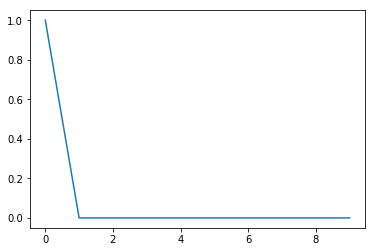

In [91]:
test_hand = [1,9,1,10,1,11,1,12,1,1]
print(hand_encode(test_hand))
prediction = model.predict(np.array(data_52encode(get_hand_df(test_hand))))
print(prediction[0])
plt.plot(prediction[0])

In [76]:
model.save('./model-100')

### Predictions

In [93]:
test_dataset_noid = test_dataset.drop(['id'], axis=1)

In [94]:
test_sample = test_dataset_noid[0:50000]
test_data_sample_encoded = data_52encode(test_sample)

In [19]:
model = keras.models.load_model('./model-100')
model.compile(optimizer=tf.train.AdamOptimizer(0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [95]:
test_data_sample_predicted_10 = model.predict(np.array(test_data_sample_encoded))
test_data_sample_predicted = np.array(list(map(np.argmax, test_data_sample_predicted_10)))
test_data_sample_labels = y_test[0:50000]
df = pd.DataFrame({'predicted': test_data_sample_predicted, 'real': test_data_sample_labels})
df = pd.concat([test_sample, df], axis=1)
wrong_answers = df[df['predicted'] != df['real']]
print(wrong_answers.shape)

(230, 12)


In [37]:
df[df['predicted'] != df['real']][0:10].drop(['predicted', 'real'], axis=1).apply(lambda h: hand_encode(np.array(h)), axis=1)

17       7♣, 6♥, 4♥, Q♣, 6♣
126    10♥, 7♣, 7♦, 7♠, 10♠
320      4♥, A♣, 4♠, 2♦, 2♣
327      7♠, Q♦, 5♦, 5♠, 5♥
330      8♣, 6♦, 7♥, 7♦, 7♣
469    7♥, Q♣, 10♠, Q♦, 10♦
665      4♣, 5♣, 3♣, A♣, 2♣
821     10♥, 5♥, 2♥, 4♥, Q♦
863      4♠, 3♠, Q♥, 4♣, Q♣
903    10♥, A♠, 10♦, A♣, 3♦
dtype: object